In [25]:
# Nesta primeira parte obtenho os d- Base: Elastic Tensor
- Característica para prever: K_VRH (escolha aleatória) - Average of K_Reuss and K_Voigt (propriedades elásticas)
- featurizers (baseado na estrutura): CoulomMatrix (mais comum), ElementProperty
- Metrica: Linear Regressionados do elastic tensor, removo as colunas não utilizadas,
# cria o dataframe "Y" com K_VRH e três dataframes com dados para "X", cada um com os respectivos featurizers


from matminer.datasets.convenience_loaders import load_elastic_tensor
from matminer.featurizers.structure import CoulombMatrix
from matminer.featurizers.conversions import StrToComposition
from matminer.featurizers.composition import ElementProperty

#obter os dados do elastic tensor e remover colunas não utilizadas
df = load_elastic_tensor()  # loads dataset in a pandas DataFrame object
unwanted_columns = ["volume", "nsites", "compliance_tensor", "elastic_tensor", 
                    "elastic_tensor_original", "K_Voigt", "G_Voigt", "K_Reuss", "G_Reuss", 
                    "G_VRH", 'elastic_anisotropy']
df = df.drop(unwanted_columns, axis=1)

#Criação do dataframe "Y"
y_K_VRH = df['K_VRH'].values


# Primeiro featurizer: CoulombMatrix
if True:
    #Criação do dataframe "X" com a coulombmatrix
    X = df['structure'].as_matrix()
    cm = CoulombMatrix(flatten=True).fit(X)
    X_CM = cm.featurize_dataframe(df.copy(), "structure")
    # exclui demais colunas, para ficar somente os dados da coulombmatrix
    excluded = ["K_VRH", "formula", "material_id", 
               "poisson_ratio", "structure", "space_group"]
    X_CM = X_CM.drop(excluded, axis=1)
    print(X_CM.head())

# Inclui couna "composition" para os próximos featurizers
df = StrToComposition().featurize_dataframe(df, "formula")

# Segundo featurizer: ElementProperty
if True:
    #Criação do dataframe "X" com as informações de EwaldEnergy
    ep = ElementProperty.from_preset(preset_name="magpie")
    X_EP = ep.featurize_dataframe(df.copy(), col_id="composition")  # Inlui a coluna "composition"
    #exclui demais colunas, para ficar somente os dados da coulombmatrix
    excluded = ["K_VRH", "formula", "material_id", 
                "poisson_ratio", "structure", "space_group", "composition"]
    X_EP = X_EP.drop(excluded, axis=1)
    print(X_EP.head())



#train_X, val_X, train_y, val_y = train_test_split(X, y_G_VRH, random_state=1)

/home/luis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



/home/luis/anaconda3/lib/python3.6/site-packages/matminer/featurizers/structure.py:618: ComplexWarning:

Casting complex values to real discards the imaginary part

/home/luis/anaconda3/lib/python3.6/site-packages/matminer/featurizers/structure.py:618: ComplexWarning:

Casting complex values to real discards the imaginary part

/home/luis/anaconda3/lib/python3.6/site-packages/matminer/featurizers/structure.py:618: ComplexWarning:

Casting complex values to real discards the imaginary part

/home/luis/anaconda3/lib/python3.6/site-packages/matminer/featurizers/structure.py:618: ComplexWarning:

Casting complex values to real discards the imaginary part




   coulomb matrix eig 0  coulomb matrix eig 1  coulomb matrix eig 2  \
0           5841.902884            285.078006           1326.842299   
1           1538.197067            212.516011            309.264650   
2            278.624411          16330.614817              0.000000   
3           2376.479468           1655.340798           1770.835984   
4           6793.296684            298.680571            243.770088   

   coulomb matrix eig 3  coulomb matrix eig 4  coulomb matrix eig 5  \
0            240.290178           1208.626149           3399.883895   
1           1220.645319            242.788829              0.000000   
2              0.000000              0.000000              0.000000   
3           1788.327486              0.000000              0.000000   
4            257.524012            254.688811           3790.842019   

   coulomb matrix eig 6  coulomb matrix eig 7  coulomb matrix eig 8  \
0           3553.755294           3546.188905           3275.871997   
1  


   minimum Number  maximum Number  range Number  mean Number  avg_dev Number  \
0            14.0            41.0          27.0    34.166667        9.111111   
1            13.0            27.0          14.0    19.000000        6.400000   
2            14.0            76.0          62.0    45.000000       31.000000   
3            31.0            31.0           0.0    31.000000        0.000000   
4            14.0            44.0          30.0    34.000000       13.333333   

   mode Number  minimum MendeleevNumber  maximum MendeleevNumber  \
0         41.0                     47.0                     78.0   
1         14.0                     58.0                     78.0   
2         14.0                     57.0                     78.0   
3         31.0                     74.0                     74.0   
4         44.0                     56.0                     78.0   

   range MendeleevNumber  mean MendeleevNumber  ...  range GSmagmom  \
0                   31.0             5

Score - LinearRegression - Coulomb Matrix:  -1923690.7156158604


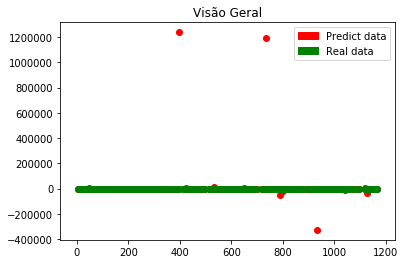

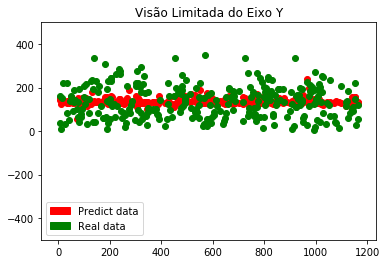

Done!


In [56]:
#Predição com Linear regression e CoulombMatrix

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
import matplotlib.patches as mpatches
import numpy

#Separação dos dados de treino e teste
train_X_CM, val_X_CM, train_y_CM, val_y_CM = train_test_split(X_CM, y_K_VRH, random_state=1)

#Fit e identificação do score
reg = linear_model.LinearRegression()
reg.fit(train_X_CM, train_y_CM)
#lembrando que "score" retorna o coeficiente de determinação da predição (R²)
print ("Score - LinearRegression - Coulomb Matrix: ", reg.score(val_X_CM,val_y_CM))

#Exibindo em gráfico para entender visualmente a diferença entre o real e a predicão
pred_y = reg.predict(val_X_CM)
pyplot.scatter(val_X_CM.index, pred_y, color = 'red')
pyplot.scatter(val_X_CM.index, val_y_CM, color = 'green')
lg_red = mpatches.Patch(color='red', label='Predict data')
lg_green = mpatches.Patch(color='green', label='Real data')
pyplot.legend(handles=[lg_red, lg_green])
pyplot.title("Visão Geral")
pyplot.show()

#neste caso é possível observar que alguns pontos geraram uma predição discrepante, afetando o score.
#baixo estou restrngindo a visualizão dos valores entre -500 e + 500, onde observamso a maioria dos 
#não discrepantes.

pyplot.scatter(val_X_CM.index, pred_y, color = 'red')
pyplot.scatter(val_X_CM.index, val_y_CM, color = 'green')
lg_red = mpatches.Patch(color='red', label='Predict data')
lg_green = mpatches.Patch(color='green', label='Real data')
pyplot.legend(handles=[lg_red, lg_green])
pyplot.ylim(-500, +500)
pyplot.title("Visão Limitada do Eixo Y")
pyplot.show()



print("Done!")


In [76]:
import pandas as pd
df = pd.DataFrame(pred_y)
df.columns = ["a"]

print ("Identifiquei %s valores fora da faixo [-500, +500]" % (df[(df.a > 500) | (df.a < -500)].count()[0]))

print ("São eles:")
print(df[(df.a > 500) | (df.a < -500)])

Identifiquei 14 valores fora da faixo [-500, +500]
São eles:
                a
9   -2.200215e+04
59   1.187653e+06
90   6.403978e+03
91  -3.424929e+03
147  3.374456e+03
157 -2.641569e+03
166 -3.163465e+04
189 -5.293686e+04
223  9.687572e+03
229 -3.263415e+05
233  6.747783e+03
239  1.237030e+06
245  2.300264e+03
287 -8.224732e+03


Em uma análise visual dos dados, identifiquei que estes valores são provenentes de moléculas com mais de 27 eigenvalues

IDX  valor           #eigenvalues
9   -2.200215e+04     55
59   1.187653e+06     38 -> eigenvalues entre 0 e 5.708,31. Não justifica predizer 1.187.653,43
90   6.403978e+03     47
91  -3.424929e+03     67
147  3.374456e+03     67
157 -2.641569e+03     35
166 -3.163465e+04     35
189 -5.293686e+04     33
223  9.687572e+03     39
229 -3.263415e+05     33
233  6.747783e+03     39
239  1.237030e+06     95
245  2.300264e+03     39
287 -8.224732e+03     33

Existem moléculas na base com número maiores de eigenvalues, etão não é a quantidade que está afetando o resultado

Como um novo teste, vou remover da base as moléculas com mais de 30 átomos (Nsites > 30)

#########################################################################################################


In [84]:
from matminer.datasets.convenience_loaders import load_elastic_tensor
from matminer.featurizers.structure import CoulombMatrix
from matminer.featurizers.conversions import StrToComposition
from matminer.featurizers.composition import ElementProperty

#obter os dados do elastic tensor e remover colunas não utilizadas
df = load_elastic_tensor()  # loads dataset in a pandas DataFrame object
#removendo linhas com mais de 30 átomos (Nsites > 30)
df = df[df.nsites<=30]
df.to_csv("/home/luis/Downloads/elastic_tensor.csv")
unwanted_columns = ["volume", "nsites", "compliance_tensor", "elastic_tensor", 
                    "elastic_tensor_original", "K_Voigt", "G_Voigt", "K_Reuss", "G_Reuss", 
                    "G_VRH", 'elastic_anisotropy']
df = df.drop(unwanted_columns, axis=1)

#Criação do dataframe "Y"
y_K_VRH = df['K_VRH'].values


# Primeiro featurizer: CoulombMatrix
if True:
    #Criação do dataframe "X" com a coulombmatrix
    X = df['structure'].as_matrix()
    cm = CoulombMatrix(flatten=True).fit(X)
    X_CM = cm.featurize_dataframe(df.copy(), "structure")
    # exclui demais colunas, para ficar somente os dados da coulombmatrix
    excluded = ["K_VRH", "formula", "material_id", 
               "poisson_ratio", "structure", "space_group"]
    X_CM = X_CM.drop(excluded, axis=1)
    print(X_CM.head())

# Inclui couna "composition" para os próximos featurizers
df = StrToComposition().featurize_dataframe(df, "formula")

# Segundo featurizer: ElementProperty
if True:
    #Criação do dataframe "X" com as informações de EwaldEnergy
    ep = ElementProperty.from_preset(preset_name="magpie")
    X_EP = ep.featurize_dataframe(df.copy(), col_id="composition")  # Inlui a coluna "composition"
    #exclui demais colunas, para ficar somente os dados de ElementProperty
    excluded = ["K_VRH", "formula", "material_id", 
                "poisson_ratio", "structure", "space_group", "composition"]
    X_EP = X_EP.drop(excluded, axis=1)
    print(X_EP.head())







/home/luis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



/home/luis/anaconda3/lib/python3.6/site-packages/matminer/featurizers/structure.py:618: ComplexWarning:

Casting complex values to real discards the imaginary part

/home/luis/anaconda3/lib/python3.6/site-packages/matminer/featurizers/structure.py:618: ComplexWarning:

Casting complex values to real discards the imaginary part

/home/luis/anaconda3/lib/python3.6/site-packages/matminer/featurizers/structure.py:618: ComplexWarning:

Casting complex values to real discards the imaginary part

/home/luis/anaconda3/lib/python3.6/site-packages/matminer/featurizers/structure.py:618: ComplexWarning:

Casting complex values to real discards the imaginary part




   coulomb matrix eig 0  coulomb matrix eig 1  coulomb matrix eig 2  \
0           5841.902884            285.078006           1326.842299   
1           1538.197067            212.516011            309.264650   
2            278.624411          16330.614817              0.000000   
3           2376.479468           1655.340798           1770.835984   
4           6793.296684            298.680571            243.770088   

   coulomb matrix eig 3  coulomb matrix eig 4  coulomb matrix eig 5  \
0            240.290178           1208.626149           3399.883895   
1           1220.645319            242.788829              0.000000   
2              0.000000              0.000000              0.000000   
3           1788.327486              0.000000              0.000000   
4            257.524012            254.688811           3790.842019   

   coulomb matrix eig 6  coulomb matrix eig 7  coulomb matrix eig 8  \
0           3553.755294           3546.188905           3275.871997   
1  


   minimum Number  maximum Number  range Number  mean Number  avg_dev Number  \
0            14.0            41.0          27.0    34.166667        9.111111   
1            13.0            27.0          14.0    19.000000        6.400000   
2            14.0            76.0          62.0    45.000000       31.000000   
3            31.0            31.0           0.0    31.000000        0.000000   
4            14.0            44.0          30.0    34.000000       13.333333   

   mode Number  minimum MendeleevNumber  maximum MendeleevNumber  \
0         41.0                     47.0                     78.0   
1         14.0                     58.0                     78.0   
2         14.0                     57.0                     78.0   
3         31.0                     74.0                     74.0   
4         44.0                     56.0                     78.0   

   range MendeleevNumber  mean MendeleevNumber  ...  range GSmagmom  \
0                   31.0             5

Score de controle - LinearRegression - Coulomb Matrix:  0.0442794952286214
Score - LinearRegression - Coulomb Matrix:  -0.01923755867902055


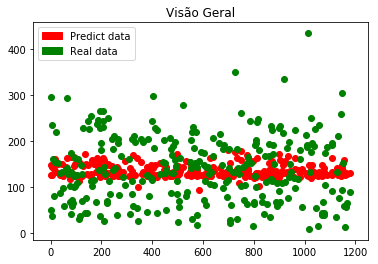

In [93]:
#Predição com Linear regression e CoulombMatrix

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
import matplotlib.patches as mpatches
import numpy

#Separação dos dados de treino e teste
train_X_CM, val_X_CM, train_y_CM, val_y_CM = train_test_split(X_CM, y_K_VRH, random_state=1)

#Fit e identificação do score
reg = linear_model.LinearRegression()
reg.fit(train_X_CM, train_y_CM)
#lembrando que "score" retorna o coeficiente de determinação da predição (R²)
print ("Score de controle - LinearRegression - Coulomb Matrix: ", reg.score(train_X_CM,train_y_CM))
print ("Score - LinearRegression - Coulomb Matrix: ", reg.score(val_X_CM,val_y_CM))
#print ("coef: ", reg.coef_)
#print("intercept: ", reg.intercept_) 

#Exibindo em gráfico para entender visualmente a diferença entre o real e a predicão
pred_y = reg.predict(val_X_CM)
pyplot.scatter(val_X_CM.index, pred_y, color = 'red')
pyplot.scatter(val_X_CM.index, val_y_CM, color = 'green')
lg_red = mpatches.Patch(color='red', label='Predict data')
lg_green = mpatches.Patch(color='green', label='Real data')
pyplot.legend(handles=[lg_red, lg_green])
pyplot.title("Visão Geral")
pyplot.show()



Score de controle - LinearRegression - Coulomb Matrix:  0.8835662686465969
Score - LinearRegression - Coulomb Matrix:  0.7990285799872073


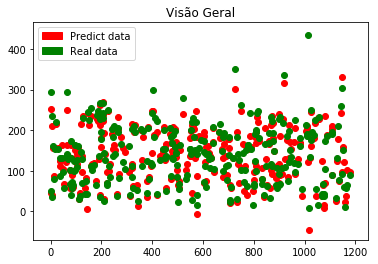

In [96]:
#Predição com Linear regression e ElementProperty

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
import matplotlib.patches as mpatches
import numpy

X_EP.to_csv("/home/luis/Downloads/X_EP.csv")

#Separação dos dados de treino e teste
train_X_EP, val_X_EP, train_y_EP, val_y_EP = train_test_split(X_EP, y_K_VRH, random_state=1)

#Fit e identificação do score
reg = linear_model.LinearRegression()
reg.fit(train_X_EP, train_y_EP)
#lembrando que "score" retorna o coeficiente de determinação da predição (R²)
print ("Score de controle - LinearRegression - Coulomb Matrix: ", reg.score(train_X_EP,train_y_EP))
print ("Score - LinearRegression - Coulomb Matrix: ", reg.score(val_X_EP,val_y_EP))
#print ("coef: ", reg.coef_)
#print("intercept: ", reg.intercept_) 

#Exibindo em gráfico para entender visualmente a diferença entre o real e a predicão
pred_y = reg.predict(val_X_EP)
pyplot.scatter(val_X_EP.index, pred_y, color = 'red')
pyplot.scatter(val_X_EP.index, val_y_EP, color = 'green')
lg_red = mpatches.Patch(color='red', label='Predict data')
lg_green = mpatches.Patch(color='green', label='Real data')
pyplot.legend(handles=[lg_red, lg_green])
pyplot.title("Visão Geral")
pyplot.show()


- testar outros métodos de regressão
- testar com featurizer do paper Hirn et al; 2016 Quantum Energy Regression using Scattering Transforms
- testar outras bases de dados
